<a href="https://colab.research.google.com/github/Codewith-Psycho/Connect-4-Game/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies
1. NumPy
2. Pandas
3. Scikit-Learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

Data Collection and Analysis

PIMA Diabetes Dataset from kaggle

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [ ]:
import pandas as pd
df = pd.DataFrame()

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# printing the last 5 rows of the dataset
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# To get the number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


HEAT MAP DIAGRAM OF DATASETS

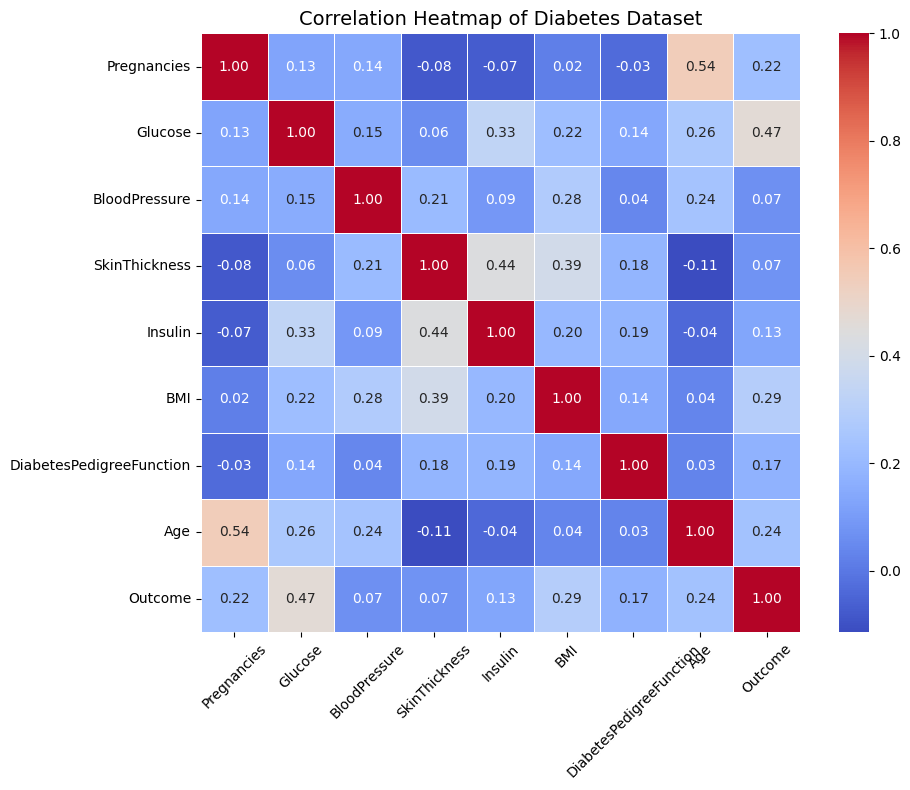

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (if not already loaded)
df = pd.read_csv('diabetes.csv')

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Pair plot of the data

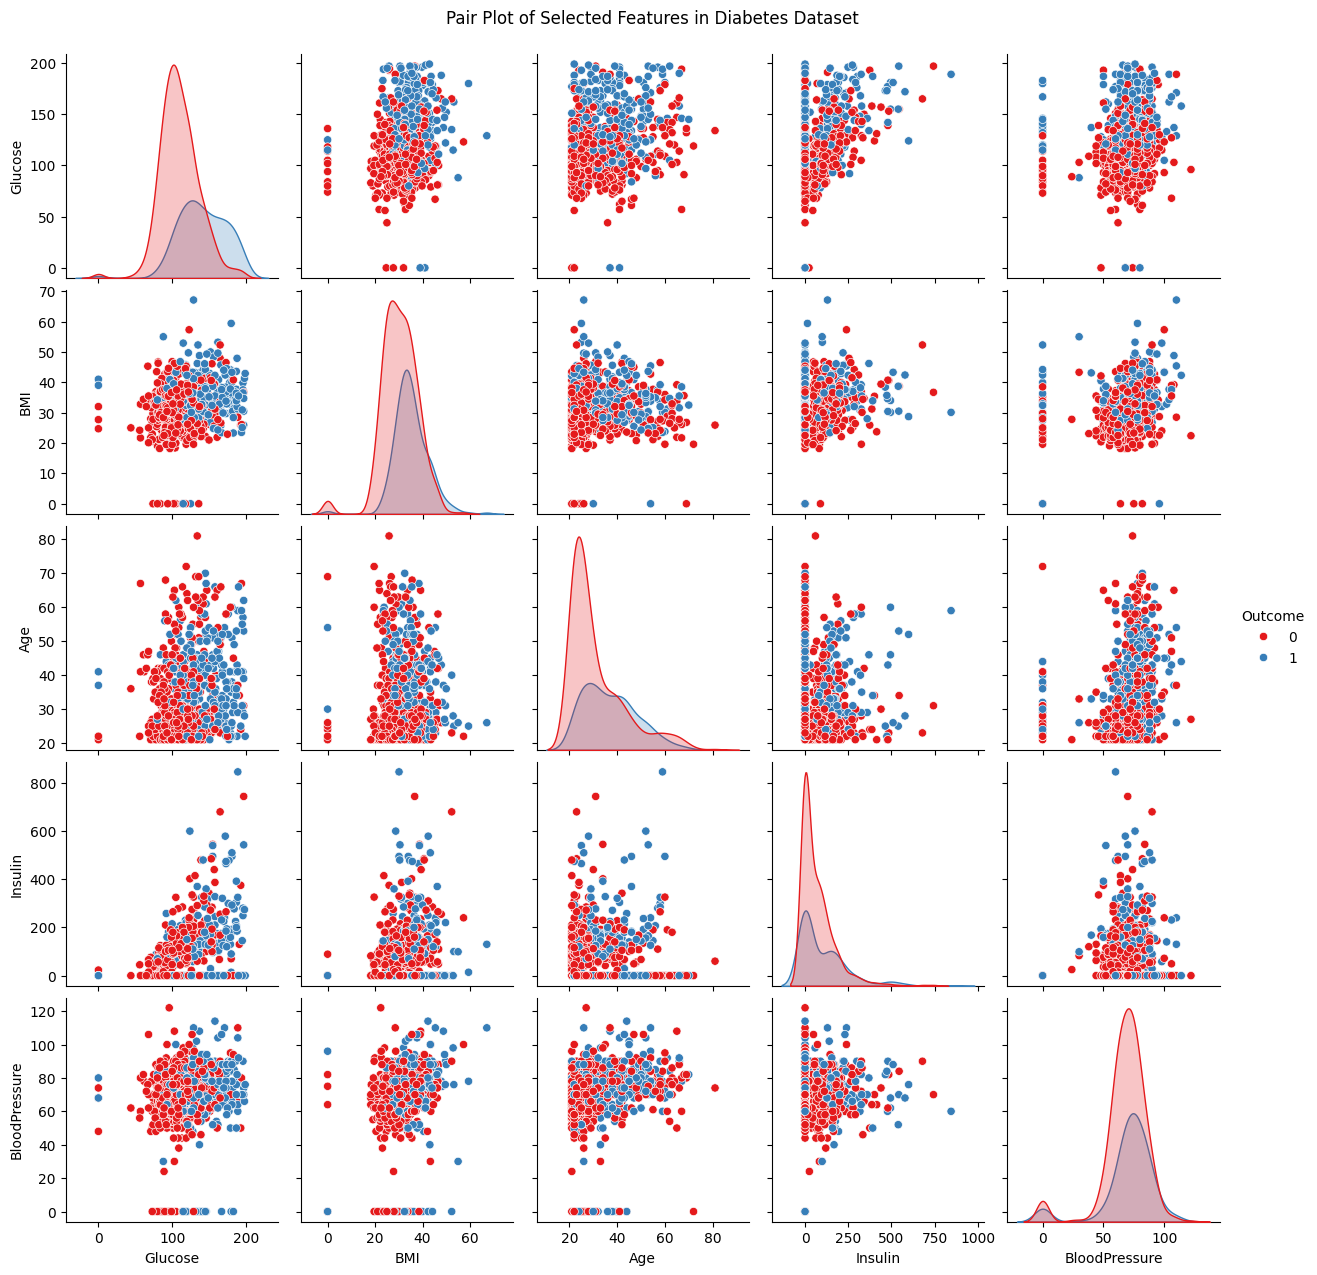

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (if not already loaded)
df = pd.read_csv('diabetes.csv')

# Optional: Reduce the number of features for better visualization
# You can include all columns, but it may be too dense
selected_columns = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Outcome']

# Pair plot with hue set to Outcome
sns.pairplot(df[selected_columns], hue='Outcome', palette='Set1', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features in Diabetes Dataset", y=1.02)
plt.show()


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear',probability = True)

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Predictions
Y_pred = classifier.predict(X_test)
Y_proba = classifier.predict_proba(X_test)[:, 1]  # Needed for ROC AUC


Model Evaluation

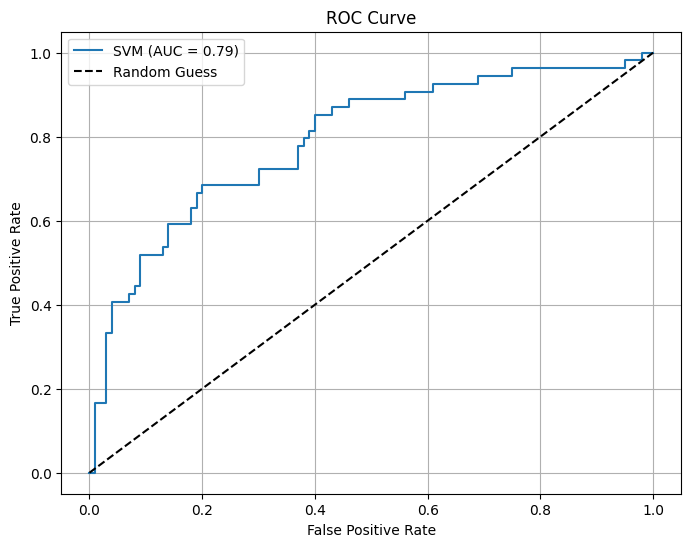

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(Y_test, Y_proba)  # Calculate AUC from the data
fpr, tpr, _ = roc_curve(Y_test, Y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


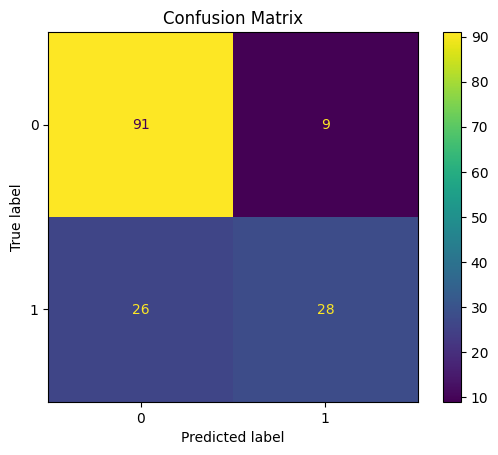

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_precision = precision_score(X_train_prediction, Y_train)
training_data_f1 = f1_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Precision score of the training data : ', training_data_precision)
print('F1_score score of the training data : ', training_data_f1)

Accuracy score of the training data :  0.7866449511400652
Precision score of the training data :  0.5887850467289719
F1_score score of the training data :  0.6579634464751958


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_precision = precision_score(X_test_prediction, Y_test)
test_data_f1 = f1_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)
print('Precision score of the test data : ', test_data_precision)
print('F1_score score of the test data : ', test_data_f1)

Accuracy score of the test data :  0.7727272727272727
Precision score of the test data :  0.5185185185185185
F1_score score of the test data :  0.6153846153846154


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Now For KNN Model

Accuracy: 0.7207792207792207
Precision: 0.6486486486486487
Recall: 0.4444444444444444
F1 Score: 0.5274725274725275
ROC AUC Score: 0.7555555555555555


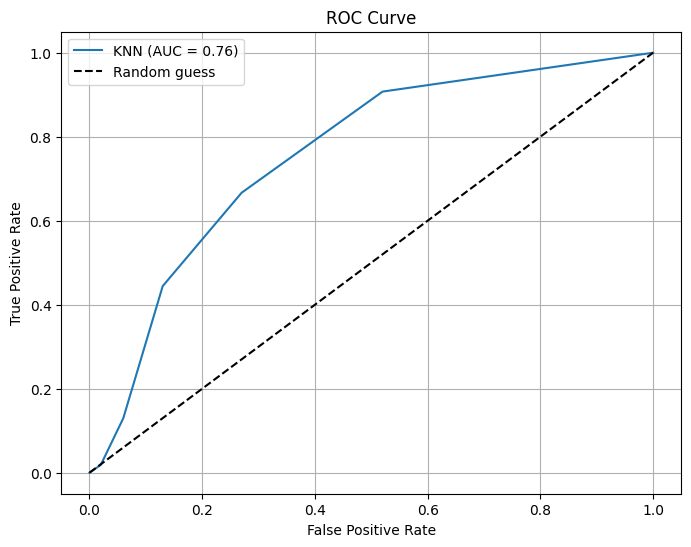

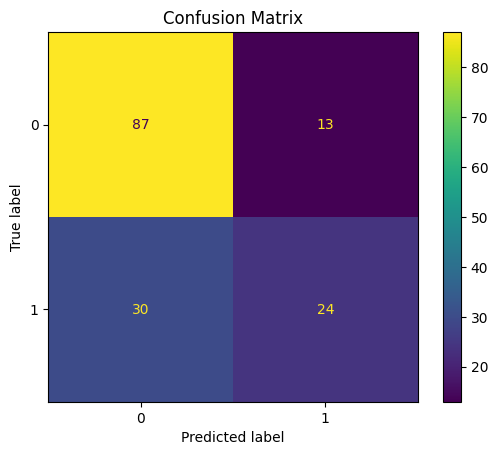

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Load the diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Split data into features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2
)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Plot ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

now based on train data


--- Training Data Evaluation ---
Train Accuracy: 0.8289902280130294
Train Precision: 0.7945945945945946
Train Recall: 0.6869158878504673
Train F1 Score: 0.7368421052631579
Train ROC AUC Score: 0.9011623831775701


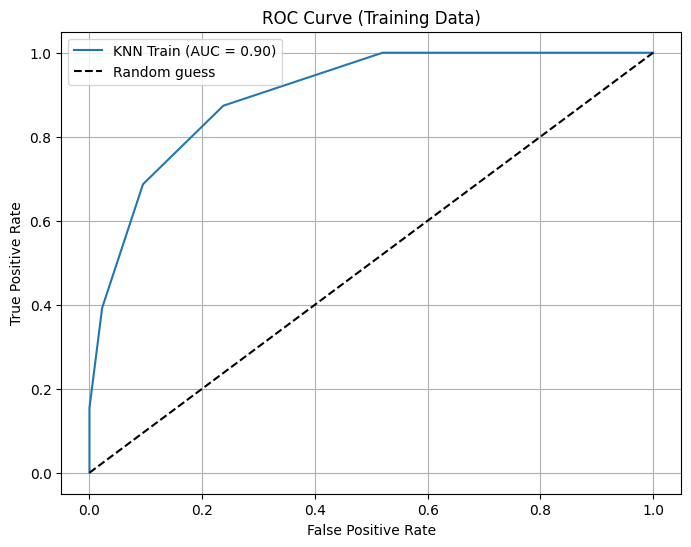

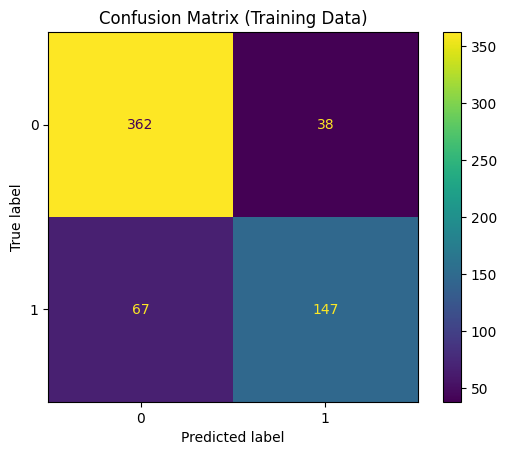

In [ ]:
# === Evaluate on Training Data ===
y_train_pred = knn_model.predict(X_train)
y_train_proba = knn_model.predict_proba(X_train)[:, 1]

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print("\n--- Training Data Evaluation ---")
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print("Train ROC AUC Score:", train_roc_auc)

# ROC Curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"KNN Train (AUC = {train_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title("Confusion Matrix (Training Data)")
plt.show()

Accuracy vs K-Plot


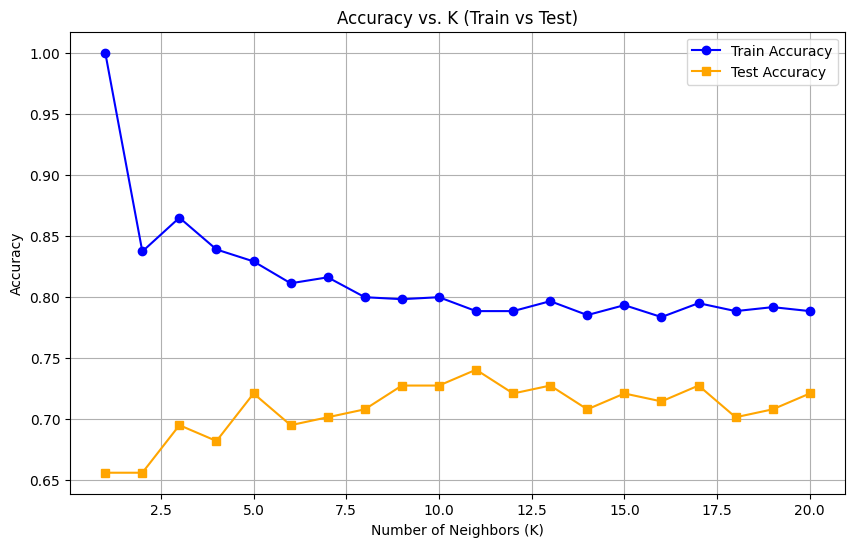

In [ ]:
k_values = range(1, 21)
test_accuracies = []
train_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

    # Train accuracy
    y_train_pred = model.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))

# Plotting both
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy', color='orange')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K (Train vs Test)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Score on the training data
X_train_prediction = knn_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_precision = precision_score(X_train_prediction, Y_train)
training_data_f1 = f1_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Precision score of the training data : ', training_data_precision)
print('F1_score score of the training data : ', training_data_f1)

Accuracy score of the training data :  0.8289902280130294
Precision score of the training data :  0.6869158878504673
F1_score score of the training data :  0.7368421052631579


In [ ]:
# Score on the test data
X_test_prediction = knn_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_precision = precision_score(X_test_prediction, Y_test)
test_data_f1 = f1_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)
print('Precision score of the test data : ', test_data_precision)
print('F1_score score of the test data : ', test_data_f1)

Accuracy score of the test data :  0.7207792207792207
Precision score of the test data :  0.4444444444444444
F1_score score of the test data :  0.5274725274725275


Now For Logistic Regression


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Split data into features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

# Standardize the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2
)

# Train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Score on the training data
X_train_prediction = logreg_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_precision = precision_score(X_train_prediction, Y_train)
training_data_f1 = f1_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Precision score of the training data : ', training_data_precision)
print('F1_score score of the training data : ', training_data_f1)

Accuracy score of the training data :  0.7850162866449512
Precision score of the training data :  0.5794392523364486
F1_score score of the training data :  0.6526315789473685


In [ ]:
# Score on the test data
X_test_prediction = logreg_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_precision = precision_score(X_test_prediction, Y_test)
test_data_f1 = f1_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)
print('Precision score of the test data : ', test_data_precision)
print('F1_score score of the test data : ', test_data_f1)

Accuracy score of the test data :  0.7597402597402597
Precision score of the test data :  0.5185185185185185
F1_score score of the test data :  0.6021505376344086


Now For Random Forest Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Load the diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Split data into features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

# Standardize the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2
)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
# Score on the training data
X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_precision = precision_score(X_train_prediction, Y_train)
training_data_f1 = f1_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Precision score of the training data : ', training_data_precision)
print('F1_score score of the training data : ', training_data_f1)

Accuracy score of the training data :  1.0
Precision score of the training data :  1.0
F1_score score of the training data :  1.0


In [ ]:
# Score on the test data
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_precision = precision_score(X_test_prediction, Y_test)
test_data_f1 = f1_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)
print('Precision score of the test data : ', test_data_precision)
print('F1_score score of the test data : ', test_data_f1)

Accuracy score of the test data :  0.7272727272727273
Precision score of the test data :  0.48148148148148145
F1_score score of the test data :  0.5531914893617021


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

print("\n📘 XGBoost:")
print("Train - Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train - Precision:", precision_score(y_train, y_train_pred))
print("Train - F1 Score:", f1_score(y_train, y_train_pred))
print("Test  - Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test  - Precision:", precision_score(y_test, y_test_pred))
print("Test  - F1 Score:", f1_score(y_test, y_test_pred))



📘 XGBoost:
Train - Accuracy: 1.0
Train - Precision: 1.0
Train - F1 Score: 1.0
Test  - Accuracy: 0.7402597402597403
Test  - Precision: 0.6521739130434783
Test  - F1 Score: 0.6


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:20:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print("\n📘 Naive Bayes:")
print("Train - Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train - Precision:", precision_score(y_train, y_train_pred))
print("Train - F1 Score:", f1_score(y_train, y_train_pred))
print("Test  - Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test  - Precision:", precision_score(y_test, y_test_pred))
print("Test  - F1 Score:", f1_score(y_test, y_test_pred))



📘 Naive Bayes:
Train - Accuracy: 0.755700325732899
Train - Precision: 0.6616161616161617
Train - F1 Score: 0.6359223300970874
Test  - Accuracy: 0.7727272727272727
Test  - Precision: 0.7209302325581395
Test  - F1 Score: 0.6391752577319587


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=2)
gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

print("📘 Gradient Boosting:")
print("Train - Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train - Precision:", precision_score(y_train, y_train_pred))
print("Train - F1 Score:", f1_score(y_train, y_train_pred))
print("Test  - Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test  - Precision:", precision_score(y_test, y_test_pred))
print("Test  - F1 Score:", f1_score(y_test, y_test_pred))


📘 Gradient Boosting:
Train - Accuracy: 0.9250814332247557
Train - Precision: 0.9285714285714286
Train - F1 Score: 0.8878048780487805
Test  - Accuracy: 0.7012987012987013
Test  - Precision: 0.6
Test  - F1 Score: 0.5106382978723404


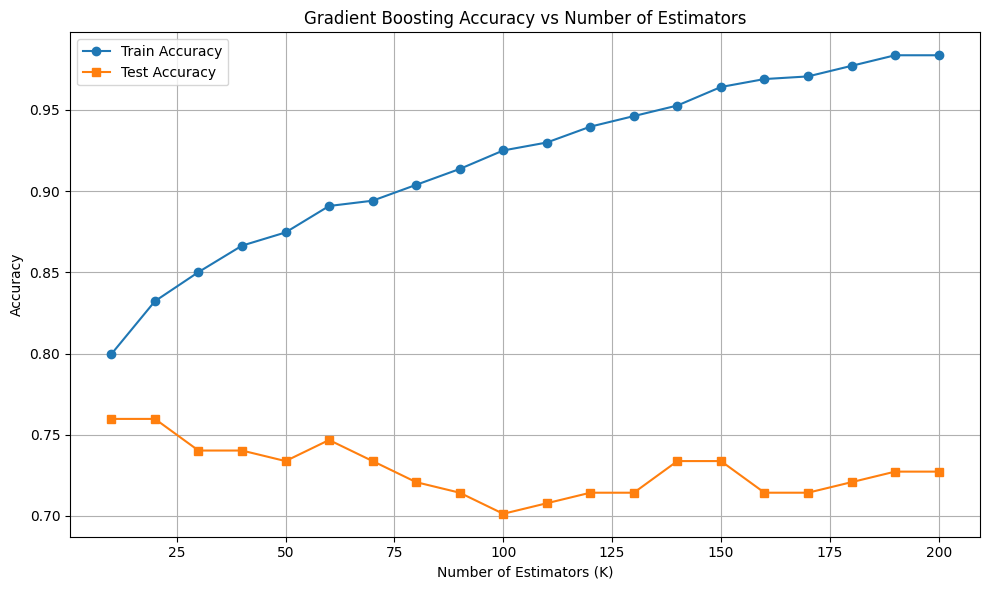

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
n_estimators_range = range(10, 201, 10)

for n in n_estimators_range:
    gb_model = GradientBoostingClassifier(n_estimators=n, random_state=2)
    gb_model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, gb_model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, gb_model.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Estimators (K)')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


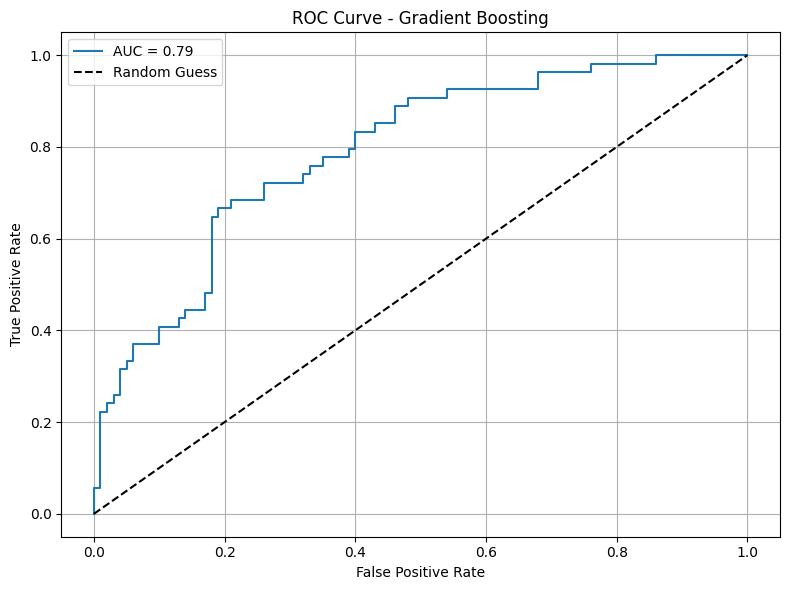

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Use final model
gb_model = GradientBoostingClassifier(random_state=2)
gb_model.fit(X_train, y_train)

# Predict probabilities
y_proba = gb_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


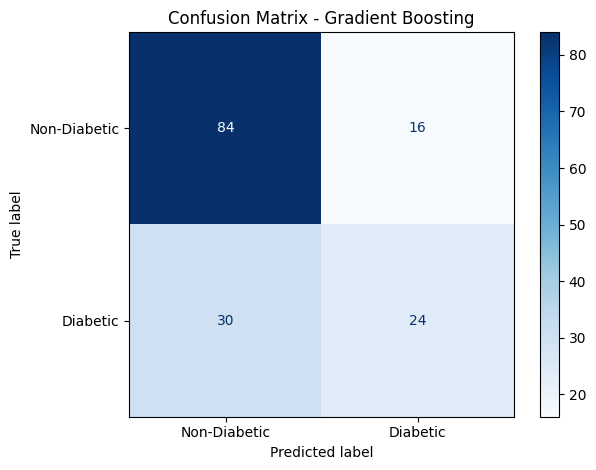

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred = gb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
# Extended dictionary with all models
models = {
    'Logistic Regression': logreg_model,
    'KNN': knn_model,
    'Random Forest': rf_model,
    'SVM': classifier,
    'Gradient Boosting': gb_model,
    'Naive Bayes': nb_model,
    'XGBoost': xgb_model
}

# Collecting metrics
results = []
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Train Accuracy': round(accuracy_score(y_train, y_train_pred), 4),
        'Train Precision': round(precision_score(y_train, y_train_pred), 4),
        'Train F1-Score': round(f1_score(y_train, y_train_pred), 4),
        'Test Accuracy': round(accuracy_score(y_test, y_test_pred), 4),
        'Test Precision': round(precision_score(y_test, y_test_pred), 4),
        'Test F1-Score': round(f1_score(y_test, y_test_pred), 4)
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Clean 2D tabular output
print("\n📊 Model Performance Summary:")
print(results_df.set_index('Model'))



📊 Model Performance Summary:
                     Train Accuracy  Train Precision  Train F1-Score  \
Model                                                                  
Logistic Regression          0.7850           0.7470          0.6526   
KNN                          0.8290           0.7946          0.7368   
Random Forest                1.0000           1.0000          1.0000   
SVM                          0.7866           0.7456          0.6580   
Gradient Boosting            0.9251           0.9286          0.8878   
Naive Bayes                  0.7557           0.6616          0.6359   
XGBoost                      1.0000           1.0000          1.0000   

                     Test Accuracy  Test Precision  Test F1-Score  
Model                                                              
Logistic Regression         0.7597          0.7179         0.6022  
KNN                         0.7208          0.6486         0.5275  
Random Forest               0.7273          0.650